In [2]:
import pandas as pd

df = pd.read_csv('c:/data/Data/ozone/ozone2.csv')

df.head()

,Solar.R,Wind,Temp,Ozone,Result
0,190.000000,7.4,67,67,0
1,118.000000,8.0,72,72,0
2,149.000000,12.6,74,74,0
3,313.000000,11.5,62,62,0
4,185.931507,14.3,56,56,0


In [3]:
df.columns

Index(['Solar.R', 'Wind', 'Temp', 'Ozone', 'Result'], dtype='object')

In [4]:
df.shape

(153, 5)

In [5]:
df.describe()

,Solar.R,Wind,Temp,Ozone,Result
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,185.931507,9.957516,77.882353,77.882353,0.555556
std,87.960267,3.523001,9.465270,9.465270,0.498536
min,7.000000,1.700000,56.000000,56.000000,0.000000
25%,120.000000,7.400000,72.000000,72.000000,0.000000
50%,194.000000,9.700000,79.000000,79.000000,1.000000
75%,256.000000,11.500000,85.000000,85.000000,1.000000
max,334.000000,20.700000,97.000000,97.000000,1.000000


In [6]:
df.groupby('Result').mean()

,Solar.R,Wind,Temp,Ozone
Result,,,,
0,180.467566,11.082353,71.367647,71.367647
1,190.302659,9.057647,83.094118,83.094118


In [7]:
df['Result'].value_counts()

1    85
0    68
Name: Result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

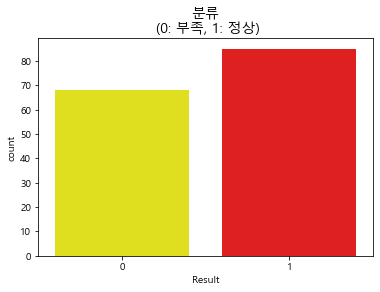

In [8]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

colors = ['yellow', 'red']

sns.countplot('Result', data=df, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)

In [9]:
cols = ['Solar.R', 'Wind', 'Temp']
X = df[cols]
y = df['Result']

array([[<AxesSubplot:xlabel='Solar.R', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Wind', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Temp', ylabel='Solar.R'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Wind'>,
        <AxesSubplot:xlabel='Wind', ylabel='Wind'>,
        <AxesSubplot:xlabel='Temp', ylabel='Wind'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Temp'>,
        <AxesSubplot:xlabel='Wind', ylabel='Temp'>,
        <AxesSubplot:xlabel='Temp', ylabel='Temp'>]], dtype=object)

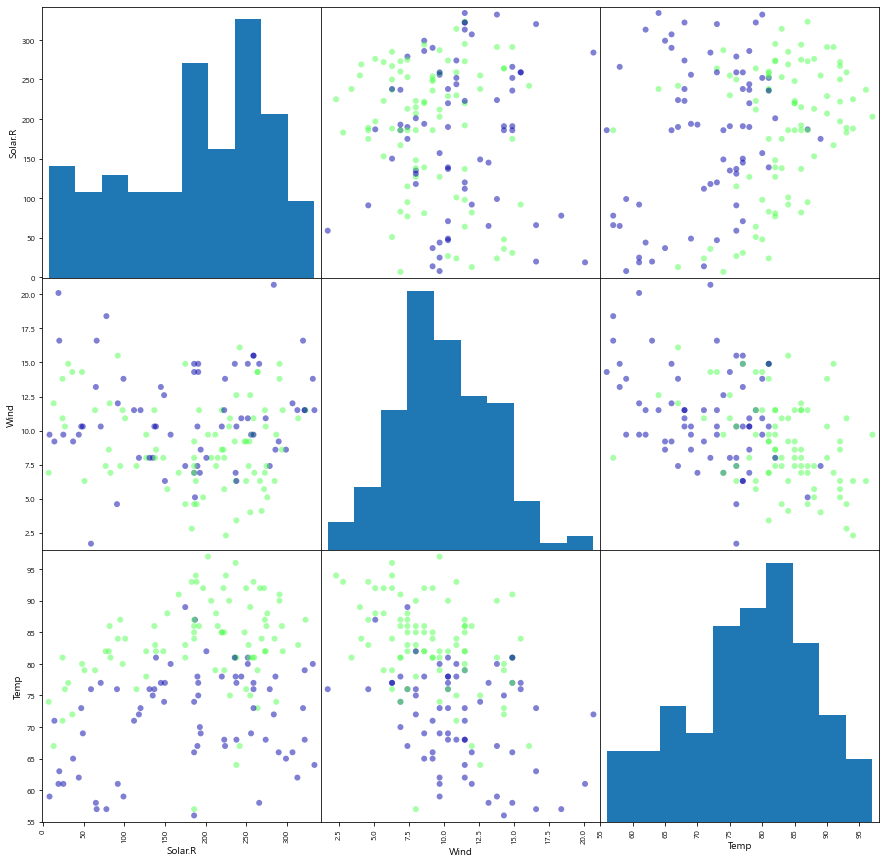

In [10]:
import mglearn
#산점도 행렬 출력
pd.plotting.scatter_matrix(X, c=y, figsize=(15,15), marker='o', cmap=mglearn.cm3)

In [20]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df_samp = pd.concat([X_samp, y_samp], axis=1)

In [23]:
#오버샘플링
from imblearn.over_sampling import SMOTE
X_sample, y_sample=SMOTE(random_state=0).fit_resample(X,y)

X_samp = pd.DataFrame(data=X_sample, columns=cols)
y_samp = pd.DataFrame(data=y_sample, columns=['Result'])
df_samp = pd.concat([X_samp, y_samp], axis=1)

In [24]:
df_samp['Result'].value_counts()

0    85
1    85
Name: Result, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

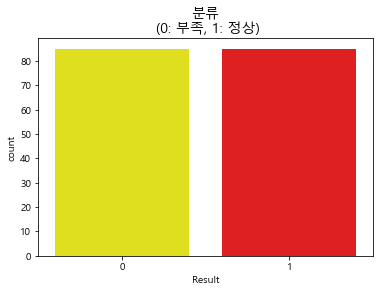

In [25]:
colors = ['yellow', 'red']

sns.countplot('Result', data=df_samp, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)

In [26]:
cols = ['Solar.R', 'Wind', 'Temp']
X = X_samp[cols]
y = y_samp['Result']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

최적의 k: 3


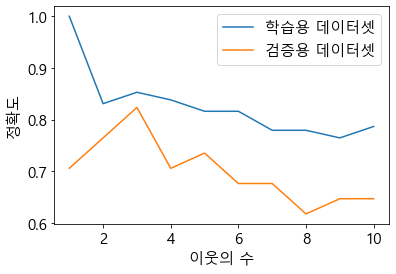

In [32]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

train_rate = []
test_rate = []

neighbors = range(1,11)

for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    train_rate.append(knn.score(X_train, y_train))
    test_rate.append(knn.score(X_test, y_test))

plt.rcParams['font.size']=15
plt.plot(neighbors, train_rate, label='학습용 데이터셋')
plt.plot(neighbors, test_rate, label='검증용 데이터셋')
plt.ylabel('정확도')
plt.xlabel('이웃의 수')
plt.legend()

max_rate = max(test_rate)
idx = np.argmax(test_rate)
print('최적의 k:', idx+1)

In [39]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [40]:
import numpy as np
pred = model.predict(X_test)
print('train:', model.score(X_train, y_train))
print('test:', model.score(X_test, y_test))
print('test:', np.mean(pred == y_test))

train: 0.8529411764705882
test: 0.8235294117647058
test: 0.8235294117647058


In [36]:
#confusion matrix(혼동행렬, 오분류표)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
cm

array([[15,  3],
       [ 6, 10]], dtype=int64)

In [37]:
df_cm = pd.DataFrame(cm, index=[0,1], columns=[0,1])

df_cm

,0,1
0,15,3
1,6,10


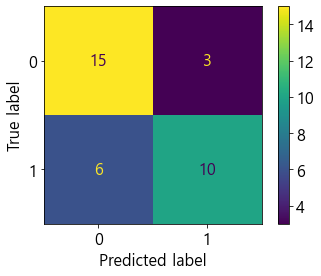

In [38]:
from sklearn.metrics import plot_confusion_matrix
plt.rcParams.update({'font.size': 16})
plot_confusion_matrix(model, X_test, y_test)